<a href="https://colab.research.google.com/github/charishma2703/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []
images=[]
flat_data = []

datadir = '/content/drive/MyDrive/images'

categories = ['cameras','phones'] # Name the folder with these categories


for i in categories:
  class_num=categories.index(i)
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)

    img_resize = resize(img_array,(150,150,3)) 
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)
    

flat_data = np.array(flat_data)
target = np.array(target)
images=np.array(images)

In [ ]:
flat_data[0]

array([0.83898039, 0.86643137, 0.89019608, ..., 0.86619608, 0.83435294,
       0.81129412])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    flat_data,target,test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid= [
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred= clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1])

In [ ]:
y_test

array([0, 1, 1, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.8571428571428571

In [ ]:
confusion_matrix(y_pred,y_test)

array([[3, 0],
       [1, 3]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSpKbZx-2GrGnGPYOPAtssaPTtZsCGHgm6GOA&usqp=CAU
(168, 300, 3)
PREDICTED OUTPUT:cameras


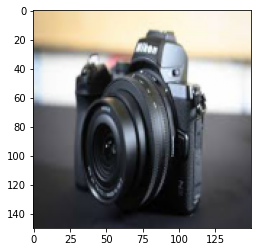

In [ ]:
flat_data= []
url = input('Enter your URL')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)

y_out=model.predict(flat_data)
y_out= categories[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')